# 한글 자연어처리
  - koNLPy를 이용한 한글 문장 분석 : 명사, 형태소 단위 (JAVA 기반, 파이썬 래퍼(Jpype) 설치 및 자바 환경변수 설정 전제)
  - wordcloud, plot를 이용한 단어 빈도수 카운트 - 시각화

In [6]:
# 한글 자연어처리
# konlpy : kkma, hannanum, okt 등 (komoran, mecab)
# 어절 단위 tokenize : nltk, 한글은? 형태소 단위 tokenize가 필요함
# 문장 분석 : 명사(kkma), 형태소 분석(hannanum)
# 문자 갯수가 늘어날수록 실행 시간도 늘어남 kkma > hannanum > twitter


# 모듈 임포트
from konlpy.tag import Kkma, Hannanum, Okt 

kko = Kkma()
han = Hannanum()
okt = Okt()

modules = [kko, han, okt]


sentence = '안녕하세요. 컴퓨터공학과 3학년 학생들의 트랙 배정 결과를 알려드립니다.'


for i in modules :
    #print(i.sentences(sentence)) # okt에서는 함수가 없다..
    print(i.nouns(sentence)) # 명사만 뽑아냄
    print(i.pos(sentence)) # 형태소 단위 토크나이즈, 품사 태깅하여 리스트화
    print("\n")    

"""
kko.sentences(sentence) # 꼬꼬마 문장(sentences) 단위 스플릿, 분석
han.sentences(sentence) # 한나눔 문장(sentences) 단위 스플릿, 분석

kko.nouns(sentence) # 꼬꼬마 명사(nouns) 단위 스플릿, 분석
han.nouns(sentence) # 한나눔 명사(nouns) 단위 스플릿, 분석
okt.nouns(sentence) # 트위터(Okt) 명사(nouns) 단위 스플릿, 분석

kko.pos(sentence) # 꼬꼬마 형태소(pos) 단위 스플릿, 분석
han.pos(sentence) # 한나눔 형태소(pos) 단위 스플릿, 분석 
okt.pos(sentence) # 한나눔 형태소(pos) 단위 스플릿, 분석 
#han.morphs('') # 단어 구조 미표시(스플릿만 함)
#okt.morphs('') # 단어 구조 미표시(스플릿만 함)
"""

['안녕', '컴퓨터', '컴퓨터공학과', '공', '학과', '3', '3학년', '학년', '학생', '트랙', '배정', '결과']
[('안녕', 'NNG'), ('하', 'XSV'), ('세요', 'EFN'), ('.', 'SF'), ('컴퓨터', 'NNG'), ('공', 'NNG'), ('학과', 'NNG'), ('3', 'NR'), ('학년', 'NNG'), ('학생', 'NNG'), ('들', 'XSN'), ('의', 'JKG'), ('트랙', 'NNG'), ('배정', 'NNG'), ('결과', 'NNG'), ('를', 'JKO'), ('알', 'VV'), ('려', 'ECD'), ('드리', 'VXV'), ('ㅂ니다', 'EFN'), ('.', 'SF')]


['안녕', '컴퓨터공학', '3학년', '학생들', '트랙', '배정', '결과']
[('안녕', 'N'), ('하', 'X'), ('세', 'E'), ('요', 'J'), ('.', 'S'), ('컴퓨터공학', 'N'), ('과', 'J'), ('3학년', 'N'), ('학생들', 'N'), ('의', 'J'), ('트랙', 'N'), ('배정', 'N'), ('결과', 'N'), ('를', 'J'), ('알리', 'P'), ('어', 'E'), ('드리', 'P'), ('ㅂ니다', 'E'), ('.', 'S')]


['컴퓨터공학', '학년', '학생', '트랙', '배정', '결과']
[('안녕하세요', 'Adjective'), ('.', 'Punctuation'), ('컴퓨터공학', 'Noun'), ('과', 'Josa'), ('3', 'Number'), ('학년', 'Noun'), ('학생', 'Noun'), ('들', 'Suffix'), ('의', 'Josa'), ('트랙', 'Noun'), ('배정', 'Noun'), ('결과', 'Noun'), ('를', 'Josa'), ('알려', 'Verb'), ('드립니다', 'Verb'), ('.', 'Punctuation')]



"\nkko.sentences(sentence) # 꼬꼬마 문장(sentences) 단위 스플릿, 분석\nhan.sentences(sentence) # 한나눔 문장(sentences) 단위 스플릿, 분석\n\nkko.nouns(sentence) # 꼬꼬마 명사(nouns) 단위 스플릿, 분석\nhan.nouns(sentence) # 한나눔 명사(nouns) 단위 스플릿, 분석\nokt.nouns(sentence) # 트위터(Okt) 명사(nouns) 단위 스플릿, 분석\n\nkko.pos(sentence) # 꼬꼬마 형태소(pos) 단위 스플릿, 분석\nhan.pos(sentence) # 한나눔 형태소(pos) 단위 스플릿, 분석 \nokt.pos(sentence) # 한나눔 형태소(pos) 단위 스플릿, 분석 \n#han.morphs('') # 단어 구조 미표시(스플릿만 함)\n#okt.morphs('') # 단어 구조 미표시(스플릿만 함)\n"

In [9]:
# Okt가 가장 좋은 것 같음 - 명사 추출이 가장 깔끔하게 된 듯

print(okt.morphs(sentence))
print(okt.morphs(sentence, stem=True)) # stemming 옵션 활성화
print("\n")

print(okt.pos(sentence))
print(okt.pos(sentence, join = True)) # join 옵션 활성화
# join 옵션 활성화시 리스트에 하나로 합쳐서 출력됨


['안녕하세요', '.', '컴퓨터공학', '과', '3', '학년', '학생', '들', '의', '트랙', '배정', '결과', '를', '알려', '드립니다', '.']
['안녕하다', '.', '컴퓨터공학', '과', '3', '학년', '학생', '들', '의', '트랙', '배정', '결과', '를', '알다', '드리다', '.']


[('안녕하세요', 'Adjective'), ('.', 'Punctuation'), ('컴퓨터공학', 'Noun'), ('과', 'Josa'), ('3', 'Number'), ('학년', 'Noun'), ('학생', 'Noun'), ('들', 'Suffix'), ('의', 'Josa'), ('트랙', 'Noun'), ('배정', 'Noun'), ('결과', 'Noun'), ('를', 'Josa'), ('알려', 'Verb'), ('드립니다', 'Verb'), ('.', 'Punctuation')]
['안녕하세요/Adjective', './Punctuation', '컴퓨터공학/Noun', '과/Josa', '3/Number', '학년/Noun', '학생/Noun', '들/Suffix', '의/Josa', '트랙/Noun', '배정/Noun', '결과/Noun', '를/Josa', '알려/Verb', '드립니다/Verb', './Punctuation']


# koNLPy 내장 데이터로 분석
  - kolaw, kobill : 한국 법률 / 한국 국회 의안 말뭉치(데이터)
  - Twitter로 명사 토크나이징 : 분석

In [17]:
from konlpy.corpus import kolaw, kobill # konlpy.corpus(말뭉치)

print(kolaw.fileids()) # 1개밖에 없음
print(kobill.fileids()) # 9개

['constitution.txt']
['1809890.txt', '1809891.txt', '1809892.txt', '1809893.txt', '1809894.txt', '1809895.txt', '1809896.txt', '1809897.txt', '1809898.txt', '1809899.txt']


In [22]:
law_file = kolaw.open('constitution.txt').read()
bill_file = kobill.open('1809894.txt').read()

#law_file
bill_file

'고등교육법 일부개정법률안\n\n(안상수의원 대표발의 )\n\n 의 안\n 번 호\n\n9894\n\n발의연월일 : 2010.  11.  15.\n\n발  의  자 : 안상수․김정훈․원희목 \n\n강석호․서상기․나성린 \n\n권영진․이춘식․정영희 \n\n이애주․안형환․백성운 \n\n김금래 의원(13인)\n\n제안이유 및 주요내용\n\n  현재 간호사의 경우 전문대학 졸업 또는 대학 졸업에 상관없이 면\n\n허증을 취득할 수 있지만, 학위의 종류가 전문학사이기 때문에 학사학\n\n위를 취득하기 위하여 87.2%가 별도로 학사학위 교육과정을 이수하고 \n\n있는 실정임.\n\n  이러한 4년제 간호 교육의 필요성과 선진 각국의 경향을 고려하고 \n\n국민에 대한 보다 나은 의료 서비스를 제공하기 위하여 대통령령이 \n\n정하는 일정한 기준을 충족하는 간호과에 대해서는 수업연한을 4년으\n\n로 하고, 수여하는 학위의 종류를 학사학위로 하도록 함(안 제50조의3 \n\n신설).\n\n- 1 -\n\n\x0c법률  제        호\n\n고등교육법 일부개정법률안\n\n고등교육법 일부를 다음과 같이 개정한다.\n\n제50조의3을 다음과 같이 신설한다.\n\n제50조의3(간호과의 수업연한 및 학위에 관한 특례) ① 대통령령이 정\n\n하는 기준을 충족하는 간호과의 수업연한은 4년으로 한다.\n\n  ② 제1항의 간호과에서 학칙이 정하는 과정을 이수한 자에 대하여\n\n는 학사학위를 수여한다.\n\n  ③ 제2항의 학위의 종류 및 수여에 관하여 필요한 사항은 대통령령\n\n으로 정한다.\n\n부      칙\n\n① 이 법은 공포 후 6개월이 경과한 날부터 시행한다.\n\n② 이 법 시행 당시 수업연한이 4년으로 된 간호과에 재학 중인 자에 \n\n대해서는 본인의 신청에 의하여 종전의 수업연한 및 학위에 관한 규\n\n정을 적용할 수 있다.\n\n- 3 -\n\n\x0c신·구조문대비표\n\n현      행\n\n개   정   안\n\n  <신  설>\n\n제50조의3(간

In [24]:
lf_token = okt.nouns(law_file) # 대한민국헌법
bf_token = okt.nouns(bill_file) # 고등교육법 일부개정법률안

#lf_token
bf_token

['고등',
 '교육법',
 '일부',
 '개정',
 '법률',
 '안',
 '안상수',
 '의원',
 '대표',
 '발의',
 '의',
 '안',
 '번',
 '호',
 '발의',
 '연월일',
 '발',
 '의',
 '자',
 '안상수',
 '김정훈',
 '원희목',
 '강석호',
 '서상기',
 '나성린',
 '권영진',
 '이춘식',
 '정영희',
 '이애주',
 '안형환',
 '백성운',
 '김금래',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '내용',
 '현재',
 '간호사',
 '경우',
 '전문',
 '대학',
 '졸업',
 '대학',
 '졸업',
 '면',
 '증',
 '취득',
 '수',
 '학위',
 '종류',
 '문학사',
 '이기',
 '때문',
 '학',
 '사학',
 '위',
 '취득',
 '위',
 '별도',
 '학사',
 '학위',
 '교육과정',
 '이수',
 '실정',
 '임',
 '간호',
 '교육',
 '필요성',
 '선진',
 '각국',
 '경향',
 '고려',
 '국민',
 '대한',
 '나은',
 '의료',
 '서비스',
 '제공',
 '위',
 '대통령령',
 '정',
 '기준',
 '충족',
 '간호',
 '과',
 '대해',
 '수업',
 '연한',
 '로',
 '수여',
 '학위',
 '종류',
 '학사',
 '학위',
 '함',
 '안',
 '제',
 '신설',
 '법률',
 '제',
 '호',
 '고등',
 '교육법',
 '일부',
 '개정',
 '법률',
 '안',
 '고등',
 '교육법',
 '일부',
 '다음',
 '개정',
 '제',
 '다음',
 '신설',
 '제',
 '간호',
 '수업',
 '연한',
 '및',
 '학위',
 '관',
 '특례',
 '대통령령',
 '정',
 '기준',
 '충족',
 '간호',
 '수업',
 '연한',
 '제',
 '항의',
 '간호',
 '과',
 '학칙',
 '정',
 '과정',
 '이수',
 '자',
 '대하',
 '학사',
 '학위',


In [27]:
#nltk의 text() 사용 : 단어 수집된 횟수, 고유 횟수(토큰) 확인
# 토크나이즈된 리스트를 매개변수로 하여..
import nltk

lf = nltk.Text(lf_token, name = "대한민국헌법")
bf = nltk.Text(bf_token, name = "고등교육법 일부개정법률안")

lists = [lf, bf]

for i in lists :
    print(len(i)) # 단어별 수집된 횟수
    print(len(set(i))) # 단어별 고유 횟수(토큰 갯수 말하는 듯?)
    print("\n")

3882
929


240
121




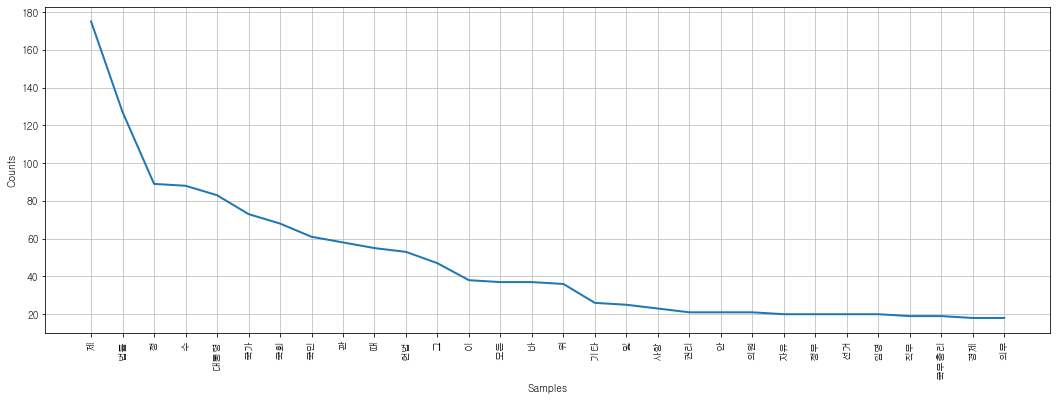

In [41]:
# 단어별 수집횟수 카운트 - 시각화(plot)
from matplotlib import pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline

# 한글폰트 지정해줘서 깨짐방지
font = font_manager.FontProperties(fname = "c:/Windows/Fonts/gulim.ttc").get_name()
rc('font', family = font)

plt.figure(figsize = (18,6))
lf.plot(30)

plt.show()

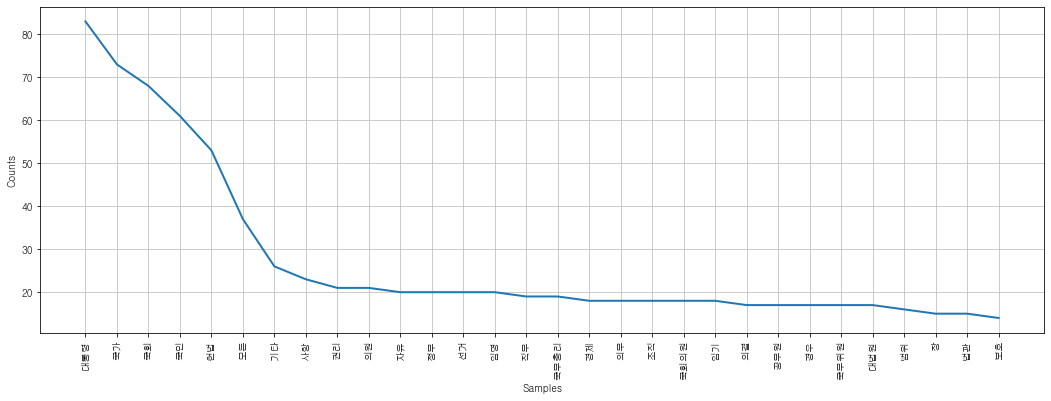

In [50]:
#stopwords 직접 만들어서 필요없는 단어 제외
stopwords = ['제', '법률', '정', '수', '때', '그', '이', '뒤', '및', '안', '이상', '관', '바', '위']

lf = [word for word in lf
     if word not in stopwords] # stopwords에 없는 단어로만

lf_new = nltk.Text(lf, name = "대한민국헌법")

plt.figure(figsize = (18,6))
lf_new.plot(30)

plt.show()

In [51]:
lf_new.count('국무총리') # 국무총리 카운트된 단어 갯수 표시

19

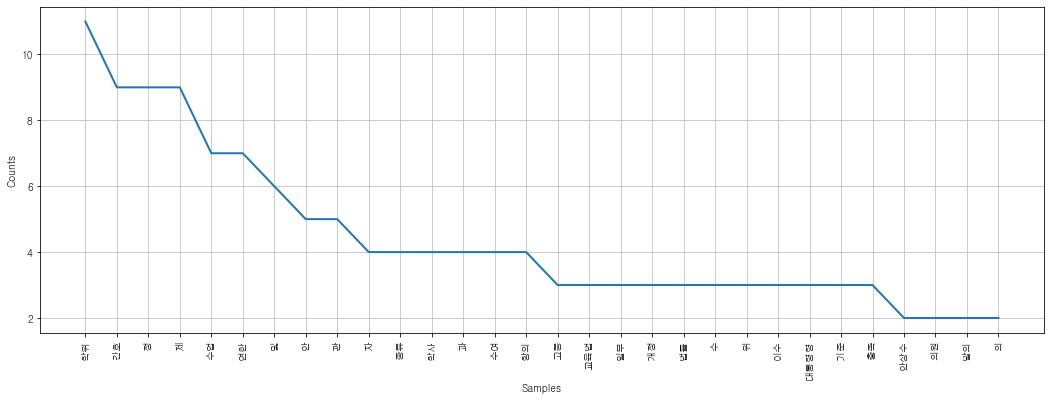

In [52]:
plt.figure(figsize = (18,6))
bf.plot(30)

plt.show()

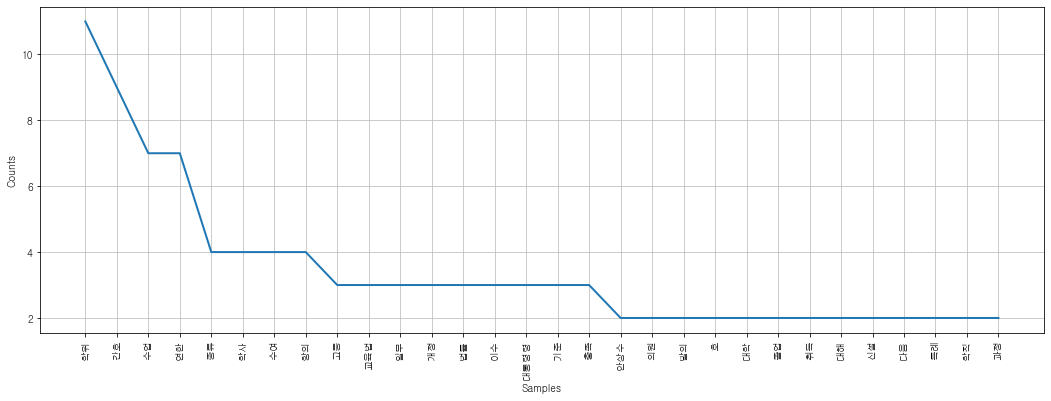

In [53]:
stopwords2 = ['정', '제', '및', '안', '관', '자', '과', '수', '위', '의']

bf = [word for word in bf
     if word not in stopwords2] # stopwords에 없는 단어로만

bf_new = nltk.Text(bf, name = "고등교육법 일부개정법률안")

plt.figure(figsize = (18,6))
bf_new.plot(30)

plt.show()

In [54]:
bf_new.count('대통령령')

3

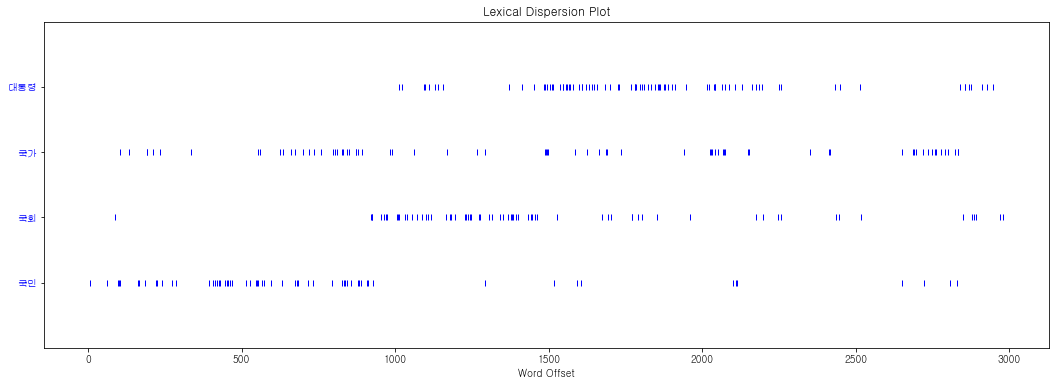

In [55]:
# 문서 내 어느 부분에 몇 번 언급되었는지 확인하여 시각화
# dispersion_plot

plt.figure(figsize = (18,6))
lf_new.dispersion_plot(['대통령', '국가', '국회', '국민'])

In [71]:
# 특정 단어 주변부(양 옆)에 사용된 단어들 확인
# concordance

lf_new.concordance('국민')

Displaying 25 of 61 matches:
대한민국 헌법 유구 역사 전통 우리 국민 운동 건립 대한민국 임시정부 법 통과 불의 항거 민주 이념 계승 조
든 영역 각인 기회 능력 최고 도로 발휘 자유 권리 책임 의무 완수 국민 생활 향상 기하 밖 항구 세계 평화 인류 공영 이바지 함 우리 우리
 국회 의결 국민투표 개정 장 강 대한민국 민주공화국 대한민국 주권 국민 모든 권력 국민 대한민국 국민 요건 국가 재외국민 보호 의무 대한민
투표 개정 장 강 대한민국 민주공화국 대한민국 주권 국민 모든 권력 국민 대한민국 국민 요건 국가 재외국민 보호 의무 대한민국 영토 한반도 
강 대한민국 민주공화국 대한민국 주권 국민 모든 권력 국민 대한민국 국민 요건 국가 재외국민 보호 의무 대한민국 영토 한반도 부속 도서 대한
승인 국제 법규 국내법 효력 외국인 국제 법 조약 지위 보장 공무원 국민 전체 대한 봉사자 국민 대하 책임 공무원 신분 정치 중립성 보장 정
효력 외국인 국제 법 조약 지위 보장 공무원 국민 전체 대한 봉사자 국민 대하 책임 공무원 신분 정치 중립성 보장 정당 설립 자유 복수정당제
성 보장 정당 설립 자유 복수정당제 보장 정당 목적 조직 활동 민주 국민 정치 의사 형성 참여 조직 정당 국가 보호 국가 정당 운영 자금 보
재판소 심판 해산 국가 전통문화 계승 발전 민족 문화 창달 노력 장 국민 권리 의무 모든 국민 인간 존엄 가치 가지 행복 추구 권리 국가 개
 전통문화 계승 발전 민족 문화 창달 노력 장 국민 권리 의무 모든 국민 인간 존엄 가치 가지 행복 추구 권리 국가 개인 불가침 기본 인권 
 행복 추구 권리 국가 개인 불가침 기본 인권 확인 보장 의무 모든 국민 법 앞 누구 성별 종교 사회 신분 정치 경제 사회 문화 생활 모든 
수 계급 제도 인정 형태 도 창설 훈장 등 영전 자 효력 특권 모든 국민 신체 자유 누구 체포 구속 압수 수색 심문 절차 처벌 보안처분 강제
누구 체포 구속 압수 수색 심문 절차 처벌 보안처분 강제 노역 모든 국민 

# 특정 단어에 대한 검색결과 분석
  - 네이버의 특정 단어 검색결과(지식iN) 페이지 크롤링

In [77]:
from bs4 import BeautifulSoup # beautifulsoup 사용해서 웹 크롤링
from urllib.request import urlopen
import urllib
import time

name = 'https://search.naver.com/search.naver?where=kin&sm=tab_jum'
fullname = name + '&query={keyword}&start={pagenum}'

res = urlopen(fullname.format(pagenum=1, keyword=urllib.parse.quote('더불어민주당')))
soup = BeautifulSoup(res, 'html.parser')
words = soup.find_all('dl')


In [78]:
wordslist = [] # 빈 리스트 생성하고 채워넣을것

for i in words : # 반복문 돌면서
    wordslist.append(i.text) # 하나씩 추가
    
wordslist

[' 기본검색   입력한 단어가 하나이상 포함된 문서 검색  ',
 ' 상세검색  정확히 일치하는 단어/문장(" ") 반드시 포함하는 단어(+) 제외하는 단어(-)  기본검색의 결과 범위를 줄이고자 할 때 사용합니다.여러개의 단어를 입력하실 때는쉼표(,)로 구분해서 입력하세요.   ',
 ' 연관검색어도움말    민주당   더불어민주당 당대표   미래통합당   더불어민주당 원내대표   민주당 상임위   더불어민주당 국회의원   더불어민주당 의석수   문재인   더불어민주당 지지율   더불어시민당     닫기 후 1주일간 유지됩니다. 연관검색어를 다시 보시겠습니까? 열기 ',
 '  질문  더불어민주당 비례정당   2020.04.02.   더불어민주당이 미래통합당을 견제하려고 비례연합정당을 만들었다고 들었는데 더불어시민당도 민주당이 만든건가요? 비례연합정당이랑 더불어시민당은 무슨 관계인가요?   답변 더불어민주당이 만든 정당은 더불어시민당입니다. 비례연합정당은 더불어민주당과 군소 진보정당이 연합하여 만든 비례정당으로 이게 더불어시민당입니다.    닉네임h22s****   ',
 '  질문  더불어민주당 의원중에   2020.05.08.   더불어민주당 의원중에 이름이 김태 라는 사람있나요? 이번에 원내대표 당선되었던데 근데 미래통합당 쪽에서 김태 원내대표 한테 김태년이라고 부르던데 년은...   답변 더불어민주당 새 원내대표는 김태년(金太年)의원으로 이름이 김태년으로 아무 문제가 없습니다.    닉네임okal****   ',
 '  질문  더불어민주당 격하게 지지합니다   2020.03.06.   더불어민주당 격하게 지지합니다   답변 자유대한민국에서는 더불어민주당을 격하게 지지한다고 누가 뭐라고 하지 않습니다. 우리 모두 자유대한민국을 지켜내서 자기가 하고 싶은 대로 하며서 행복하고 즐겁게...    닉네임bj26****   ',
 '  질문  더불어 민주당과 미래통합당중 어느당이 더 많은 문제를...   2020.04.17.   더불어 민주당과 미래통합당중 

In [82]:
# 반복문 이용 여러 장 긁어오기 

from tqdm import tqdm_notebook # 진행도 표시?

textlist = [] # 똑같이 빈 리스트 생성 후

for i in tqdm_notebook(range(1, 100, 10)) : # 반복문 돌려서추가할 것임
    res = urlopen(fullname.format(pagenum=1, keyword=urllib.parse.quote('더불어민주당')))
    soup = BeautifulSoup(res, 'html.parser')
    words = soup.find_all('dl')
    
    for i in words : # 반복문 돌면서
        textlist.append(i.text) # 하나씩 추가

textlist

[' 기본검색   입력한 단어가 하나이상 포함된 문서 검색  ',
 ' 상세검색  정확히 일치하는 단어/문장(" ") 반드시 포함하는 단어(+) 제외하는 단어(-)  기본검색의 결과 범위를 줄이고자 할 때 사용합니다.여러개의 단어를 입력하실 때는쉼표(,)로 구분해서 입력하세요.   ',
 ' 연관검색어도움말    민주당   더불어민주당 당대표   미래통합당   더불어민주당 원내대표   민주당 상임위   더불어민주당 국회의원   더불어민주당 의석수   문재인   더불어민주당 지지율   더불어시민당     닫기 후 1주일간 유지됩니다. 연관검색어를 다시 보시겠습니까? 열기 ',
 '  질문  더불어민주당 비례정당   2020.04.02.   더불어민주당이 미래통합당을 견제하려고 비례연합정당을 만들었다고 들었는데 더불어시민당도 민주당이 만든건가요? 비례연합정당이랑 더불어시민당은 무슨 관계인가요?   답변 더불어민주당이 만든 정당은 더불어시민당입니다. 비례연합정당은 더불어민주당과 군소 진보정당이 연합하여 만든 비례정당으로 이게 더불어시민당입니다.    닉네임h22s****   ',
 '  질문  더불어민주당 의원중에   2020.05.08.   더불어민주당 의원중에 이름이 김태 라는 사람있나요? 이번에 원내대표 당선되었던데 근데 미래통합당 쪽에서 김태 원내대표 한테 김태년이라고 부르던데 년은...   답변 더불어민주당 새 원내대표는 김태년(金太年)의원으로 이름이 김태년으로 아무 문제가 없습니다.    닉네임okal****   ',
 '  질문  더불어민주당 격하게 지지합니다   2020.03.06.   더불어민주당 격하게 지지합니다   답변 자유대한민국에서는 더불어민주당을 격하게 지지한다고 누가 뭐라고 하지 않습니다. 우리 모두 자유대한민국을 지켜내서 자기가 하고 싶은 대로 하며서 행복하고 즐겁게...    닉네임bj26****   ',
 '  질문  더불어 민주당과 미래통합당중 어느당이 더 많은 문제를...   2020.04.17.   더불어 민주당과 미래통합당중 

In [87]:
# nltk, Okt 사용
# import nltk
# from konlpy.tag import Okt

texts = '' # 하나의 문자열로 저장

for i in textlist[:100] :
    texts = texts + i + '\n'

#texts
tokenize = okt.morphs(texts)

tokenize

['기본',
 '검색',
 '입력',
 '한',
 '단어',
 '가',
 '하나',
 '이상',
 '포함',
 '된',
 '문서',
 '검색',
 '상세',
 '검색',
 '정확히',
 '일치',
 '하는',
 '단어',
 '/',
 '문장',
 '("',
 '")',
 '반드시',
 '포함',
 '하는',
 '단어',
 '(+)',
 '제외',
 '하는',
 '단어',
 '(-)',
 '기',
 '본',
 '검색',
 '의',
 '결과',
 '범위',
 '를',
 '줄이고자',
 '할',
 '때',
 '사용',
 '합니다',
 '.',
 '여러',
 '개',
 '의',
 '단어',
 '를',
 '입력',
 '하실',
 '때',
 '는',
 '쉼표',
 '(,)',
 '로',
 '구분',
 '해서',
 '입력',
 '하세요',
 '.',
 '연관검색어',
 '도움말',
 '민주당',
 '더불어',
 '민주당',
 '당',
 '대표',
 '미래',
 '통합',
 '당',
 '더불어',
 '민주당',
 '원내대표',
 '민주당',
 '상임',
 '위',
 '더불어',
 '민주당',
 '국회의원',
 '더불어',
 '민주당',
 '의',
 '석수',
 '문재인',
 '더불어',
 '민주당',
 '지지율',
 '더불어',
 '시민',
 '당',
 '닫기',
 '후',
 '1',
 '주',
 '일간',
 '유지',
 '됩니다',
 '.',
 '연관검색어',
 '를',
 '다시',
 '보시겠습니까',
 '?',
 '열기',
 '질문',
 '더불어',
 '민주당',
 '비례',
 '정당',
 '2020.04',
 '.',
 '02',
 '.',
 '더불어',
 '민주당',
 '이',
 '미래',
 '통합',
 '당',
 '을',
 '견제',
 '하려고',
 '비례',
 '연합',
 '정당',
 '을',
 '만들었다고',
 '들었는데',
 '더불어',
 '시민',
 '당',
 '도',
 '민주당',
 '이',
 '만든건',
 '가요',
 '?',
 '비례',
 '연합',
 

In [89]:
tokenize_new = nltk.Text(tokenize, name = '더불어민주당') # 텍스트화 시키고

# 갯수확인
print(len(tokenize_new.tokens)) # 모은 단어
print(len(set(tokenize_new.tokens))) # 중복 뺀 고유한 횟수(토큰 갯수 말하는 듯)

6258
361


In [92]:
tokenize_new.vocab().most_common(100) # 빈도수 가장 많은 순서대로 100개

[('민주당', 351),
 ('더불어', 336),
 ('.', 236),
 ('당', 163),
 ('이', 155),
 ('은', 123),
 ('?', 111),
 ('가', 109),
 ('...', 85),
 ('질문', 76),
 ('답변', 76),
 ('닉네임', 76),
 ('를', 72),
 ('정당', 63),
 ('을', 63),
 ('미래', 56),
 ('통합', 56),
 ('으로', 54),
 ('좌파', 49),
 ('시민', 47),
 ('는', 45),
 ('단어', 40),
 ('비례', 40),
 ('에', 39),
 ('의', 38),
 ('의원', 38),
 ('자유', 38),
 ('이랑', 37),
 ('결제', 35),
 ('검색', 32),
 ('원내대표', 32),
 ('2020.04', 32),
 ('연합', 32),
 ('게', 32),
 ('중', 32),
 ('문제', 32),
 ('****', 31),
 ('에서', 31),
 ('정책', 31),
 ('한', 30),
 (',', 30),
 ('인가요', 29),
 ('진보', 29),
 ('우파', 29),
 ('취소', 28),
 ('입력', 24),
 ('하는', 24),
 ('합니다', 24),
 ('과', 24),
 ('이번', 24),
 ('김태년', 24),
 ('격하', 24),
 ('지지', 24),
 ('어느', 24),
 ('마을', 24),
 ('대표', 23),
 ('02', 23),
 ('님', 23),
 ('(', 22),
 ('다', 22),
 ('적', 22),
 ('요', 21),
 ('총선', 21),
 ('하나', 16),
 ('포함', 16),
 ('때', 16),
 ('연관검색어', 16),
 ('만든', 16),
 ('입니다', 16),
 ('이름', 16),
 ('김태', 16),
 ('없습니다', 16),
 ('대한민국', 16),
 ('더', 16),
 ('많은', 16),
 ('17', 16),
 ('

In [127]:
# 불필요 단어 제거해보고 다시 카운트
stopwords = ['.','이','은', '가', '?', '...', '질문', '답변', '닉네임','를',
            '을', '으로', '는', '단어', '에', '의', '이랑', '검색', '2020.04',
            '게', '중', '에서', '****', '한', ',', '인가요', '취소', '입력',
            '하는', '합니다', '과', '이번', '어느', '02', '님', '(', '다', '요',
            '하나', '포함', '때', '연관검색어', '만든', '입니다', '이름',
            '없습니다', '더', '많은', '17', '역시', '잘', '못', '예', '들어',
            '비교', '그래서', '랑', '로', 'h', '후', '22', 's', '2020.03', '들',
            ')', '2019.12', '2020.01', '2020.02', '2019.11', '어떻게', '뭔가',
            '된', '=', '문서', '상세', '정확히', '일치', '/', '문장', '("', 
            '")', '반드시', '제외', '(+)', '(-)', '전', '기', '본', '할', '여러',
            '개', '하실', '기준', '나뉘는', '끝나면', '이상', '결과', '범위', '당']

In [128]:
tokenize_new = [word for word in tokenize_new
               if word not in stopwords]

tokenize_new = nltk.Text(tokenize_new, name = '더불어민주당')
tokenize_new.vocab().most_common(30) # 40줄부턴 유의미한 결과가 안나오는데?
# 일단 30개로만?

[('민주당', 351),
 ('더불어', 336),
 ('정당', 63),
 ('미래', 56),
 ('통합', 56),
 ('좌파', 49),
 ('시민', 47),
 ('비례', 40),
 ('의원', 38),
 ('자유', 38),
 ('결제', 35),
 ('원내대표', 32),
 ('연합', 32),
 ('문제', 32),
 ('정책', 31),
 ('진보', 29),
 ('우파', 29),
 ('김태년', 24),
 ('격하', 24),
 ('지지', 24),
 ('마을', 24),
 ('대표', 23),
 ('적', 22),
 ('총선', 21),
 ('김태', 16),
 ('대한민국', 16),
 ('선거', 16),
 ('군산시', 16),
 ('장', 16),
 ('기업', 16)]

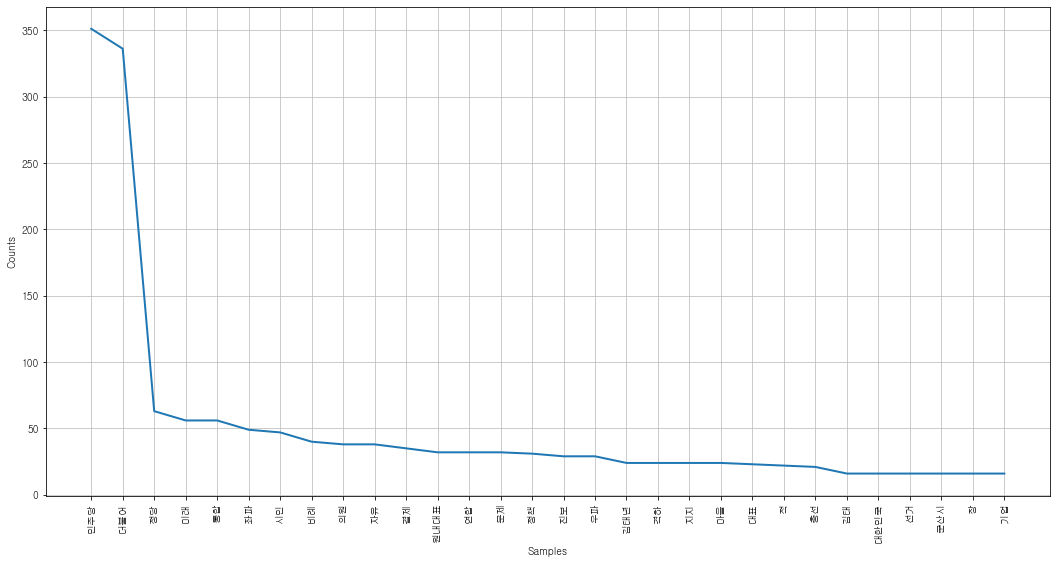

In [129]:
plt.figure(figsize = (18, 9))
tokenize_new.plot(30)

plt.show()

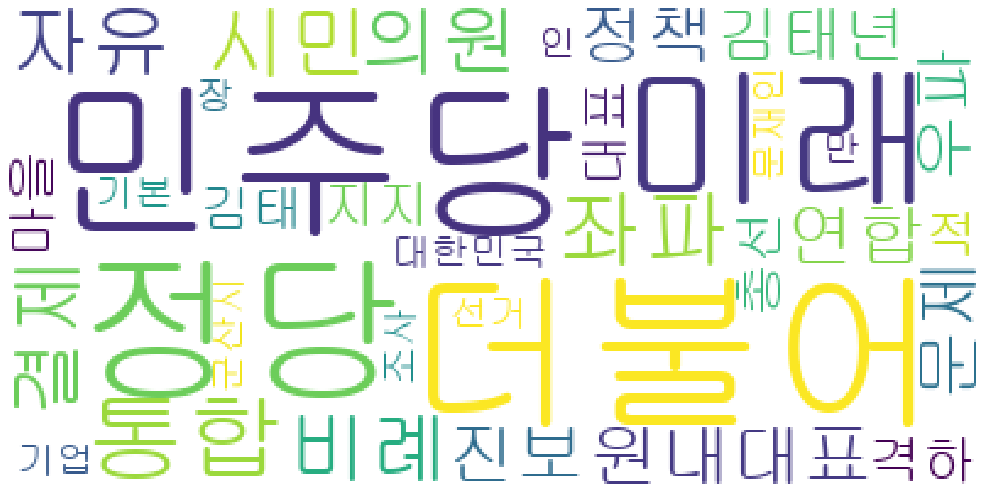

In [131]:
# 워드클라우드 써서 나타내보기

from wordcloud import WordCloud, STOPWORDS

fp = 'c:/Windows/Fonts/gulim.ttc'

data = tokenize_new.vocab().most_common(35)
wordcloud = WordCloud(font_path = fp, relative_scaling = 0.1, background_color = 'white').generate_from_frequencies(dict(data))

plt.figure(figsize = (18, 9))
plt.imshow(wordcloud)
plt.axis("off")

plt.show()

In [133]:
# 조사, 어미 제거

results = [] # 빈 리스트 생성 후
lines = tokenize_new

for i in lines :
    new_list = okt.pos(i, norm = True, stem = True)
    r = []
    
    for i in new_list :
        if i[1] not in ["Josa", "Eomi", "Punctuation"] : # 뒤에 태깅된 품사가 3가지일 경우 추가하지 않음
            r.append(i[0]) # 태깅된 품사가 저게 아니면 앞쪽 키값을 추가
        
    rr = (" ".join(r).strip()) # strip() - join()
    results.append(rr) # 빈 리스트에 추가
    print(rr)

기본
줄이다
사용
쉼표

구분
하다
하다
도움말
민주당
더불다
민주당
대표
미래
통합
더불다
민주당
원내대표
민주당
상임
위
더불다
민주당
국회의원
더불다
민주당
석수
문재인
더불다
민주당
지지율
더불다
시민
닫다
1
주
일간
유지
되다
다시
보다
열기
더불다
민주당
비례
정당
더불다
민주당
미래
통합
견제
하다
비례
연합
정당
만들다
들다
더불다
시민
도
민주당
만들다
가요
비례
연합
정당
더불다
시민
무슨
관계
더불다
민주당
정당
더불다
시민
비례
연합
정당
더불다
민주당
군소
진보
정당
연합
하다
비례
정당
더불다
시민
더불다
민주당
의원
2020.05
08
더불다
민주당
의원
김태

사람
있다
원내대표
당선
되어다
근데
미래
통합
쪽
김태
원내대표

김태년

부르다
년
더불다
민주당
새
원내대표
김태년
金太年
의원
김태년
아무
문제
okal
더불다
민주당
격하
지지
06
더불다
민주당
격하
지지
자유
대한민국

더불다
민주당
격하
지지
고
누가
뭐라다
하다
않다
우리
모두
자유
대한민국
지키다
자기
하다
싶다
대로
하다
행복하다
즐겁다
bj
26
더불다
민주당
미래
통합
문제
더불다
민주당
미래
통합
문제
일으키다
비판
많다
지지자
보다
상대방
문제
많다
보이

상대
적
인
겁니다
친절하다
남쌤
선거
더불다
민주당
걸
선거
더불다
민주당
걸다
야
겠다
군산시
장
만
하다
더불다
민주당
잘못
군산시
장
하다
그걸
더불다
민주당
전체
씌우다
말다
a
반

같다
반중
자유
민주주의
우파
미래
통합
더불다
민주당
정책
한쪽
치우치다
중립
정책
해주다
미래
통합
기업
키우다
정책

어떻다
어떠하다
방법
통해
실현
시키다
더불다
민주당
기업
마을
회의
열다
민주당

마을
대표
민주당
개똥이
네
말또

집
민주당
마을
기금
이미
몇
억
이나
모이다
일단
의인
공손하다
바퀴벌레
더불다
민주당
조사
05
제
숙제
더불다
민주당
조사해
야하다
조사
하다
좋다
필수
적
인
내용
만
알다
내공
100
드리다
더불다
민주당
기본
정보
더불다
민주당
더불다
민주당
2020.th

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



가능

서울
연합뉴스
강병철
보배
기자
더불다
민주당
이해찬
대표
23일
민주당
출신
무소속
손
혜원
의원

정봉주
의원
주도하다
비
naver
me
기본
줄이다
사용
쉼표

구분
하다
하다
도움말
민주당
더불다
민주당
대표
미래
통합
더불다
민주당
원내대표
민주당
상임
위
더불다
민주당
국회의원
더불다
민주당
석수
문재인
더불다
민주당
지지율
더불다
시민
닫다
1
주
일간
유지
되다
다시
보다
열기
더불다
민주당
비례
정당
더불다
민주당
미래
통합
견제
하다
비례
연합
정당
만들다
들다
더불다
시민
도
민주당
만들다
가요
비례
연합
정당
더불다
시민
무슨
관계
더불다
민주당
정당
더불다
시민
비례
연합
정당
더불다
민주당
군소
진보
정당
연합
하다
비례
정당
더불다
시민
더불다
민주당
의원
2020.05
08
더불다
민주당
의원
김태

사람
있다
원내대표
당선
되어다
근데
미래
통합
쪽
김태
원내대표

김태년

부르다
년
더불다
민주당
새
원내대표
김태년
金太年
의원
김태년
아무
문제
okal
더불다
민주당
격하
지지
06
더불다
민주당
격하
지지
자유
대한민국

더불다
민주당
격하
지지
고
누가
뭐라다
하다
않다
우리
모두
자유
대한민국
지키다
자기
하다
싶다
대로
하다
행복하다
즐겁다
bj
26
더불다
민주당
미래
통합
문제
더불다
민주당
미래
통합
문제
일으키다
비판
많다
지지자
보다
상대방
문제
많다
보이

상대
적
인
겁니다
친절하다
남쌤
선거
더불다
민주당
걸
선거
더불다
민주당
걸다
야
겠다
군산시
장
만
하다
더불다
민주당
잘못
군산시
장
하다
그걸
더불다
민주당
전체
씌우다
말다
a
반

같다
반중
자유
민주주의
우파
미래
통합
더불다
민주당
정책
한쪽
치우치다
중립
정책
해주다
미래
통합
기업
키우다
정책

어떻다
어떠하다
방법
통해
실현
시키다
더불다
민주당
기업
마을
회의
열다
민주당

마을
대표
민주당
개똥이
네
말또

집
민주당
마을
기금
이미
몇
억
이나
모이다
일단
의인
공손하다
바퀴벌레
더불다
민주당
조사
05
제
숙제
더불다


In [144]:
# 단어 간 유사도 분석 : gensim, word2vec
# 파일 저장 후 다시 불러와서 분석
import gensim
from gensim.models import word2vec

with open('model.data', 'w', encoding = 'UTF-8') as file:
    file.write("\n".join(results))
    
data = word2vec.LineSentence('model.data')
model = word2vec.Word2Vec(data, size = 200, window = 10, hs = 1, min_count = 2, sg = 1)

model.save('더불어민주당.model') #저장

In [157]:
model = word2vec.Word2Vec.load('더불어민주당.model')

model.wv.most_similar(positive=['민주당']) 
#model.wv.most_similar(positive=['문재인']) # 동사 안빠져서 조금 이상함

[('하나요', 0.1933826506137848),
 ('일으키다', 0.16620196402072906),
 ('정상', 0.16520990431308746),
 ('연합뉴스', 0.16508138179779053),
 ('총선', 0.162309929728508),
 ('일단', 0.15054692327976227),
 ('그', 0.1472940742969513),
 ('유지', 0.14636875689029694),
 ('08', 0.145346999168396),
 ('야하다', 0.14433199167251587)]

In [156]:
model.wv.most_similar(positive=['미래'])
#model.wv.most_similar(positive=['통합'])

[('구분', 0.18577313423156738),
 ('북한', 0.1816670000553131),
 ('않다', 0.13956621289253235),
 ('즐겁다', 0.12781134247779846),
 ('08', 0.12291097640991211),
 ('만큼', 0.11400797963142395),
 ('金太年', 0.11243962496519089),
 ('기자', 0.10270287841558456),
 ('후보', 0.09875175356864929),
 ('김태', 0.09826840460300446)]

In [159]:
model.wv.most_similar(positive=['미래', '통합'], negative=['민주당']) # 미래, 통합과 유사하면서 그 중에 민주당과 유사한 것은 빼서
# 정확도가 그리 높지는 않은 듯(20%?) : 인물명으로 하면 다를까 싶음

[('북한', 0.20988065004348755),
 ('대통령', 0.20950013399124146),
 ('26', 0.16050410270690918),
 ('열리다', 0.14299917221069336),
 ('한도', 0.13963034749031067),
 ('네', 0.13747067749500275),
 ('사이트', 0.13644403219223022),
 ('도움말', 0.12534166872501373),
 ('金太年', 0.12180560827255249),
 ('2020.05', 0.11597482115030289)]